# Casos de test generados aleatoriamente

In [1]:
import random
random.seed(2019)

In [2]:
def crear_test(n):
    pares = list()
    for i in range(n):
        w, r = random.randint(1, 30), random.randint(1, 50)
        pares.append([w, r])
    return pares

In [3]:
ns = list(range(1,31,1))
resistencias = [10, 20, 50, 75, 100, 1000]

In [4]:
k=0
with open('random_suite_tp1.txt', 'a') as file:
    for i in range(10):
        for r in resistencias:
            for n in ns:
                k+=1
                file.write("{} {}\n".format(n, r))
                for p in crear_test(n):
                    file.write("{} {}\n".format(p[0], p[1]))
                file.write("\n")

In [6]:
k

1800

In [5]:
1800/60

30.0

In [9]:
10*(6*(2**31-1))

128849018820

# Casos de test del peor caso de BTF generados automaticamente

In [3]:
def crear_peor_caso(n,r):
    # R >= n
    return [[1,r+1] for i in range(n)]

In [4]:
peores_casos_n = list(range(10, 31, 1))
peores_casos_r = [10, 20, 50, 75, 100]

In [5]:
k=0
with open('worse_case.txt', 'a') as file:
    for i in range(10):
        for r in peores_casos_r:
            for n in peores_casos_n:
                if r >= n:
                    k+=1
                    file.write("{} {}\n".format(n, r))
                    for _w, _r in crear_peor_caso(n,r):
                        file.write("{} {}\n".format(_w, _r))
                    file.write("\n")

In [6]:
k

750

with open('best_case.txt', 'a') as file:
    file.write("1\n10000 1000\n")
    for _w, _r in [[1000,100] for i in range(10000)]:
        file.write("{} {}\n".format(_w, _r))
    file.write("\n")

## Casos de test del peor caso de PD

In [14]:
def crear_peor_caso(n,r):
    # R >= n
    return [[1,r+1] for i in range(n)]

In [15]:
nr = list(range(10, 50, 10))
rs = list(range(100, 1001, 100))

In [16]:
def crear_test_pd(n,r):
    pares = list()
    for i in range(n):
        w, res = random.randint(1, int(n**0.7)), random.randint(1, int(r**0.8))
        pares.append([w, res])
    return pares

In [17]:
k = 0
for i in nr:
    with open('codigo/tests/tests_pd_exahustivo_{}.txt'.format(i), 'a') as file:
        file.write("10\n")
        for j in rs:
            file.write("{} {}\n".format(i, j))
            for p in crear_test_pd(i, j):
                file.write("{} {}\n".format(p[0], p[1]))
            file.write("\n")
    file.close()

def crear_test_wcbto(n,r):
    pares = list()
    for i in range(n-1):
        pares.append([1, r+1])
    pares.append([r+10, 1])
    return pares

peores_casos_n = list(range(10, 31, 1))
peores_casos_r = [10, 20, 50, 75, 100]

k = 0
with open('worse_case_bto.txt', 'a') as file:
    for r in peores_casos_r:
        for n in peores_casos_n:
            if r >= n:
                k+=1
                file.write("{} {}\n".format(n, r))
                for _w, _r in crear_test_wcbto(n,r):
                    file.write("{} {}\n".format(_w, _r))
                file.write("\n")

k

# Analisis

## - Performance de cada uno
## - Comparacion entre ellos

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_size('x-large')

## Graficos y demas
### FB

In [22]:
540 * 4

2160

In [23]:
results_fb = pd.read_csv('resultados/results_fb.txt', delimiter=' ')
results_fb['esperado'] = 2 ** results_fb['n'] * 19 / 1000000
results_fb['ms'] = results_fb['t'] / 1000000

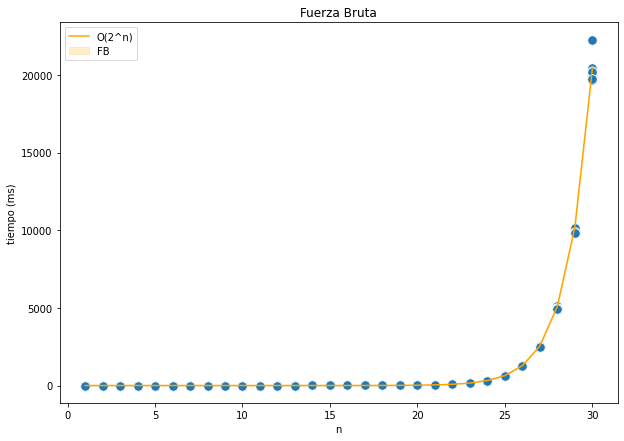

In [24]:
y = results_fb.ms.tolist()
x = results_fb.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(data=results_fb, x='n', y='esperado', color="orange")
fig_fb = sns.scatterplot(x, y, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Fuerza Bruta", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/fb_vs_est')

### Correlacion entre t_ej y t_esp

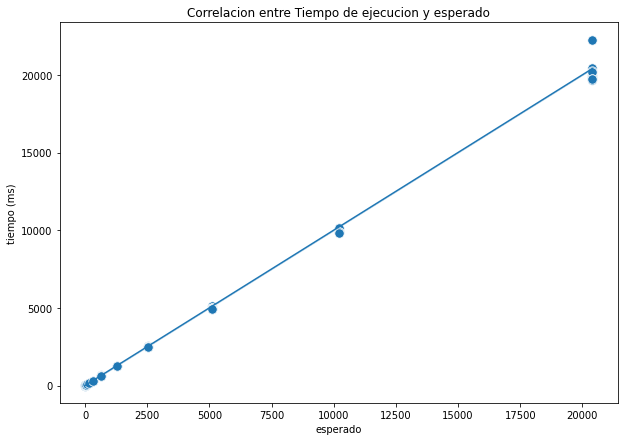

In [25]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(results_fb['esperado'], results_fb['esperado'])
fig_fb = sns.scatterplot(results_fb['esperado'], results_fb['ms'], s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_fb.set(title="Correlacion entre Tiempo de ejecucion y esperado", xlabel='esperado', ylabel='tiempo (ms)')
plt.savefig('img/fb_corr')

In [26]:
results_fb['ms'].corr(results_fb['esperado'])

0.9996350929563

---
## BTF

In [27]:
results_btf = pd.read_csv('resultados/results_btf.txt', delimiter=' ')
results_btf['esperado'] = (2 ** results_btf['n']) * 0.000000005
results_btf['ms'] = results_btf['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

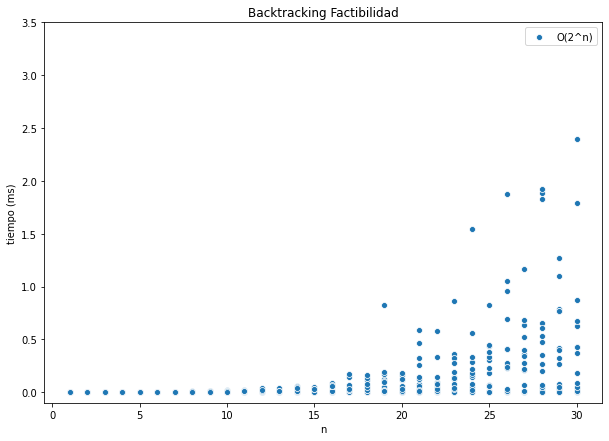

In [28]:
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(results_btf.n.tolist(), results_btf.ms.tolist())
# fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="orange")
plt.ylim(-0.1, 3.5)
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

---
## BTO

In [29]:
results_bto = pd.read_csv('resultados/results_bto.txt', delimiter=' ')
results_bto['esperado'] = 2 ** results_bto['n'] * 0.01/1000000
results_bto['ms'] = results_bto['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Optimalidad')]

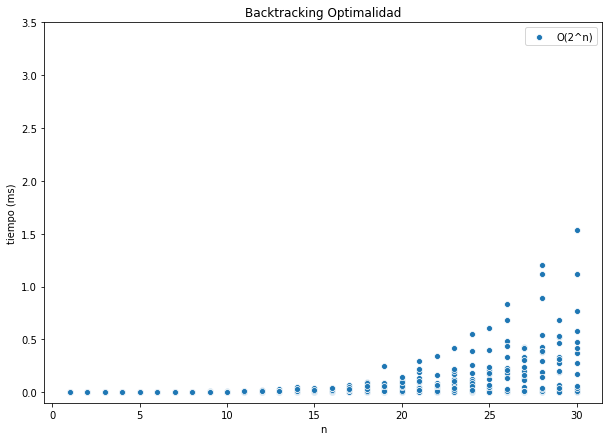

In [30]:
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(results_bto.n.tolist(), results_bto.ms.tolist())
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
plt.ylim(-0.1, 3.5)
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Optimalidad", xlabel='n', ylabel='tiempo (ms)')

In [71]:
results_bto.groupby(['test_set','n','r']).mean()

res       t      esperado      inferior        ms
test_set n  r                                                     
1        1  1      0     272  2.000000e-07  8.000000e-08  0.000272
            10     1     119  2.000000e-07  8.000000e-08  0.000119
            20     0      83  2.000000e-07  8.000000e-08  0.000083
            50     1     100  2.000000e-07  8.000000e-08  0.000100
            75     1     103  2.000000e-07  8.000000e-08  0.000103
...              ...     ...           ...           ...       ...
3        30 10     4   43857  1.073742e+02  2.400000e-06  0.043857
            20     5   58432  1.073742e+02  2.400000e-06  0.058432
            50     7  772609  1.073742e+02  2.400000e-06  0.772609
            75     7  473326  1.073742e+02  2.400000e-06  0.473326
            100    6  582420  1.073742e+02  2.400000e-06  0.582420

[540 rows x 5 columns]

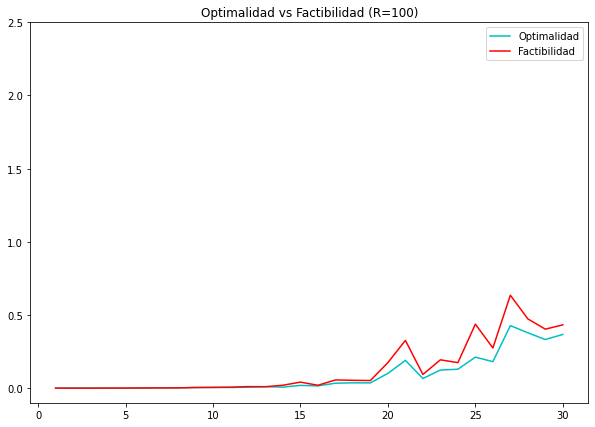

In [32]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100].n.tolist(), results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100].ms.tolist(), color='c')
fig_fb = sns.lineplot(results_btf.loc[results_btf.test_set==1].loc[results_btf.r==100].n.tolist(), results_btf.loc[results_btf.test_set==1].loc[results_btf.r==100].ms.tolist(), color='r')
plt.ylim(-0.1, 2.5)
plt.legend(labels=['Optimalidad', 'Factibilidad'])
plt.title('Optimalidad vs Factibilidad (R=100)')
plt.savefig('img/bt_comp_both')
# fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

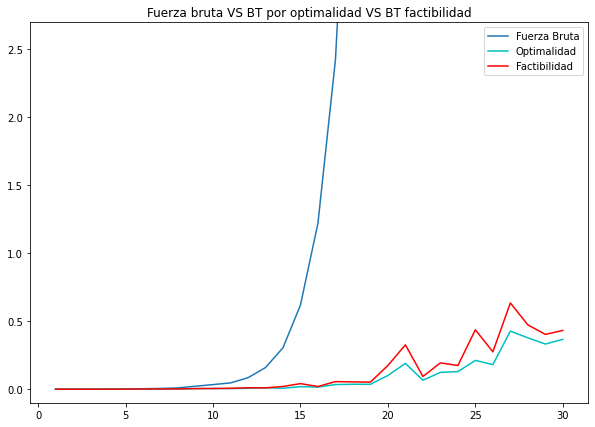

In [33]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(results_fb.loc[results_fb.test_set==1].loc[results_fb.r==100].n.tolist(), results_fb.loc[results_fb.test_set==1].loc[results_fb.r==100].ms.tolist())
fig_fb = sns.lineplot(results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100].n.tolist(), results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100].ms.tolist(), color='c')
fig_fb = sns.lineplot(results_btf.loc[results_btf.test_set==1].loc[results_btf.r==100].n.tolist(), results_btf.loc[results_btf.test_set==1].loc[results_btf.r==100].ms.tolist(), color='r')
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['Fuerza Bruta','Optimalidad','Factibilidad'])
plt.ylim(-0.1, 2.7)
plt.title('Fuerza bruta VS BT por optimalidad VS BT factibilidad')
plt.savefig('img/bt_comp_fb')
# fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

### Correlacion entre tiempo de ejecucion y esperada

---
---

## Comparacion entre todos

In [34]:
results_bto = pd.read_csv('resultados/results_bto.txt', delimiter=' ')
results_bto['esperado'] = (2 ** results_bto['n']) * 0.0000001
results_bto['inferior'] = results_bto['n'] * 0.08/1000000
results_bto['ms'] = results_bto['t'] / 1000000

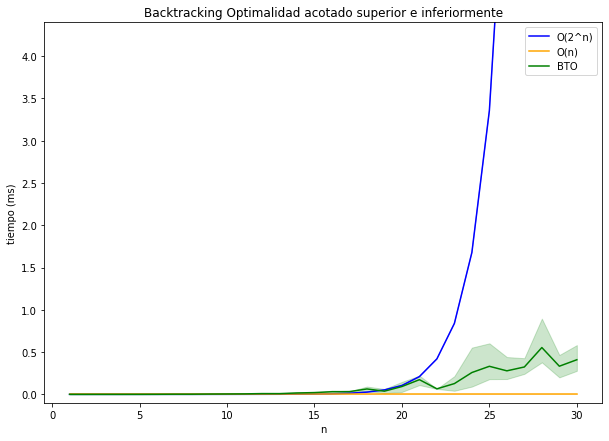

In [35]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="b")
fig_fb = sns.lineplot(data=results_bto, x='n', y='inferior', color="orange")
fig_fb = sns.lineplot(results_bto.loc[results_bto.r==100].n.tolist(), results_bto.loc[results_bto.r==100].ms.tolist(), color='g')
fig_fb.legend(labels=['O(2^n)','O(n)','BTO'])
plt.ylim(-0.1, 4.4)
fig_fb.set(title="Backtracking Optimalidad acotado superior e inferiormente", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/bto_acotado')

---

In [36]:
results_btf = pd.read_csv('resultados/results_btf.txt', delimiter=' ')
results_btf['esperado'] = (2 ** results_btf['n']) * 0.0000002
results_btf['inferior'] = results_btf['n'] * 0.06/1000000
results_btf['ms'] = results_btf['t'] / 1000000

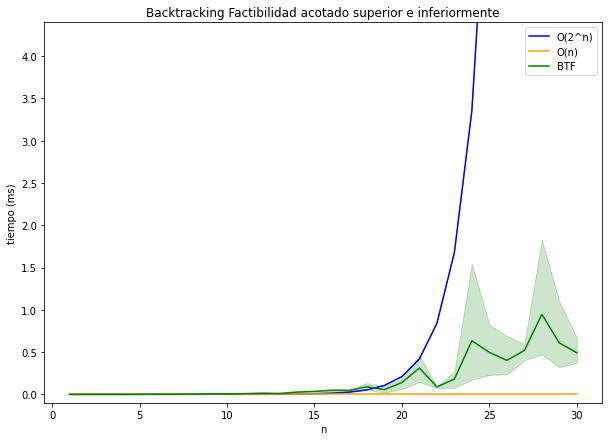

In [37]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="b")
fig_fb = sns.lineplot(data=results_btf, x='n', y='inferior', color="orange")
fig_fb = sns.lineplot(results_btf.loc[results_btf.r==100].n.tolist(), results_btf.loc[results_btf.r==100].ms.tolist(), color='g')
plt.ylim(-0.1, 4.4)
fig_fb.legend(labels=['O(2^n)','O(n)','BTF'])
fig_fb.set(title="Backtracking Factibilidad acotado superior e inferiormente", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/btf_acotado')

---
## PD

In [38]:
results_pd = pd.read_csv('resultados/results_dp.txt', delimiter=' ')
results_pd['esperado'] = results_pd['n'] * results_pd['r'] * 50 / 1000000 - 0.005
results_pd['ms'] = results_pd['t'] / 1000000

### Tiempo de ejecucion vs esperada

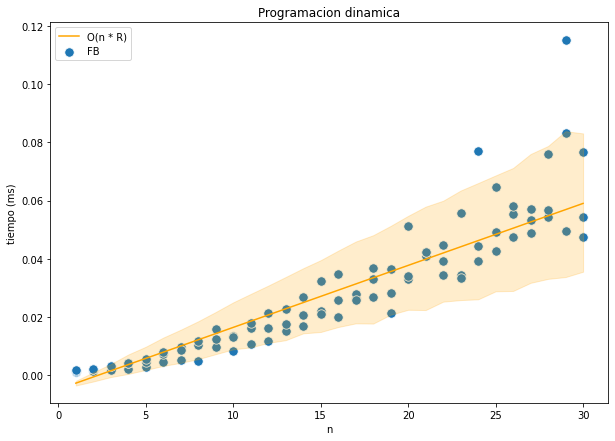

In [39]:
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(results_pd.loc[results_pd.r==100].n.tolist(), results_pd.loc[results_pd.r==100].ms.tolist(), s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_fb = sns.lineplot(data=results_pd, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(n * R)','FB'])
fig_fb.set(title="Programacion dinamica", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/pd_vs_esperado')

## Peor caso de BTF vs FB

In [40]:
results_btf_wc = pd.read_csv('resultados/results_wc_btf.txt', delimiter=' ')
results_btf_wc['esperado'] = (2 ** results_btf_wc['n']) * 2
results_btf_wc['ms'] = results_btf_wc.t / 1000000

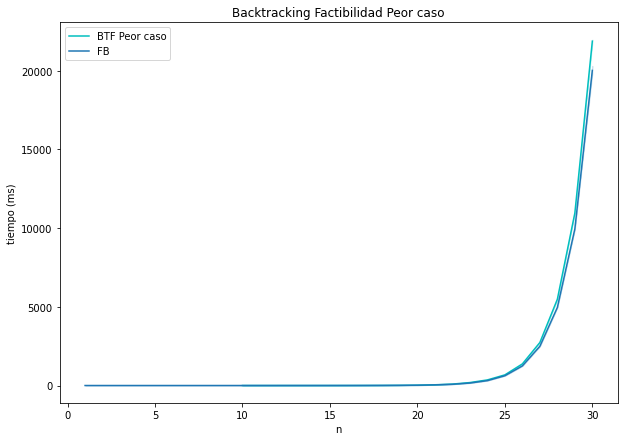

In [41]:
plt.figure(figsize=(10, 7))
fig_btf_wc = sns.lineplot(results_btf_wc.n.tolist(), results_btf_wc.ms.tolist(), color='c')
fig_btf_wc = sns.lineplot(results_fb.n.tolist(), results_fb.ms.tolist())
# plt.ylim(-0.1, 10)
fig_btf_wc.legend(labels=['BTF Peor caso', 'FB'])
fig_btf_wc.set(title="Backtracking Factibilidad Peor caso", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/btf_wc')

In [42]:
results_bto_wc = pd.read_csv('resultados/results_wc_bto.txt', delimiter=' ')
results_bto_wc['esperado'] = (2 ** results_bto_wc['n']) * 2
results_bto_wc['ms'] = results_bto_wc.t / 1000000

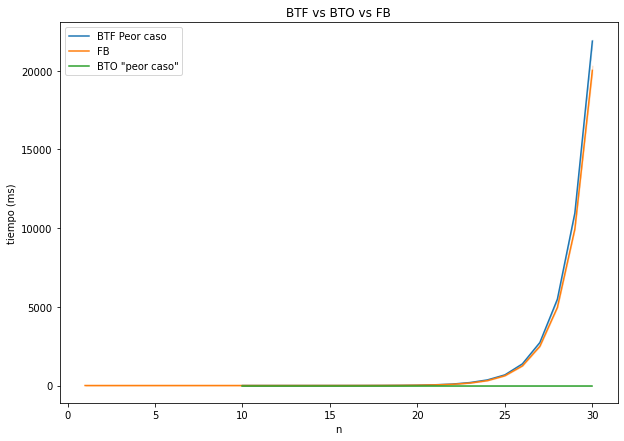

In [43]:
plt.figure(figsize=(10, 7))
fig_btf_wc = sns.lineplot(results_btf_wc.n.tolist(), results_btf_wc.ms.tolist())
fig_btf_wc = sns.lineplot(results_fb.n.tolist(), results_fb.ms.tolist())
fig_btf_wc = sns.lineplot(results_bto_wc.n.tolist(), results_bto_wc.ms.tolist())
# plt.ylim(-0.1, 5)
fig_btf_wc.legend(labels=['BTF Peor caso', 'FB', 'BTO "peor caso"'])
fig_btf_wc.set(title="BTF vs BTO vs FB", xlabel='n', ylabel='tiempo (ms)')
plt.savefig('img/bto_wc_vs_btf_fb')

In [44]:
results_pd_stress = pd.read_csv('resultados/results_pd_exahustivo.txt', delimiter=' ')
results_pd_stress['ms'] = results_pd_stress['t'] / 1000000
results_pd_stress.head(5)

,n,r,res,t,ms
0,1000,1000,41,23271386,23.271386
1,1000,1500,52,32739819,32.739819
2,1000,2000,62,30884960,30.884960
3,1000,2500,65,28547994,28.547994
4,1000,3000,63,29955931,29.955931


In [45]:
x = results_pd_stress.n
y = results_pd_stress.r

In [46]:
nr = list(range(1000, 10001, 500))

In [47]:
results_pd_stress.loc[results_pd_stress.n==1000].loc[results_pd_stress.r==1000].ms

0    23.271386
Name: ms, dtype: float64

In [48]:
temp = []
for i in nr:
    _t = []
    for j in nr:
        _t.append(results_pd_stress.loc[results_pd_stress.n==i].loc[results_pd_stress.r==j].ms.tolist()[0])
    temp.append(_t)

In [49]:
result = pd.DataFrame(temp, index=nr, columns=nr)

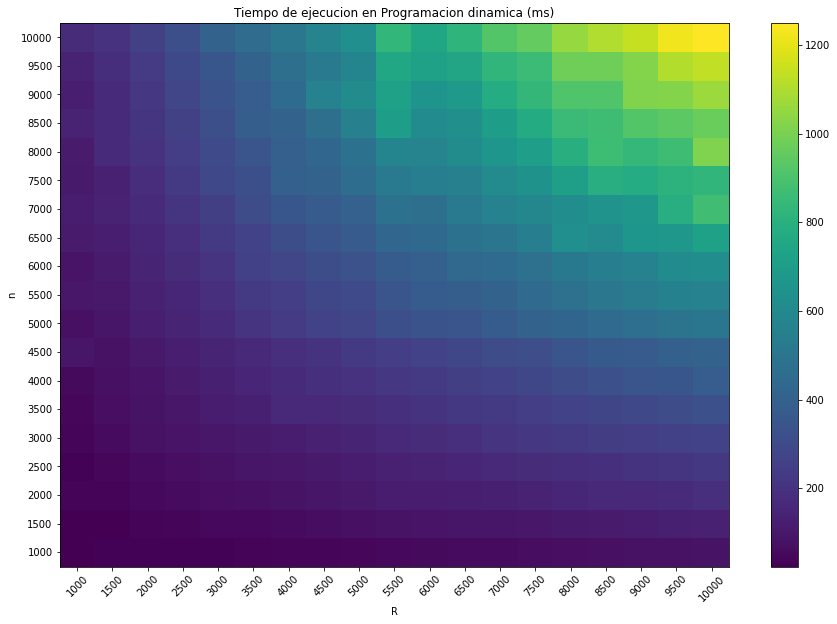

In [50]:
plt.figure(figsize=(15, 10))
plt.pcolor(result)
plt.yticks(np.arange(0.5, len(result.index), 1), result.index)
plt.xticks(np.arange(0.5, len(result.columns), 1), result.columns)
plt.title("Tiempo de ejecucion en Programacion dinamica (ms)")
plt.xlabel("R")
plt.ylabel("n")
plt.xticks(rotation=45)
plt.colorbar()
plt.savefig('img/heat_map')

In [51]:
results_pd_stress['esperado'] = (results_pd_stress['n'] * results_pd_stress['r']) * 1 / 100000 + 50

In [52]:
N = 6500

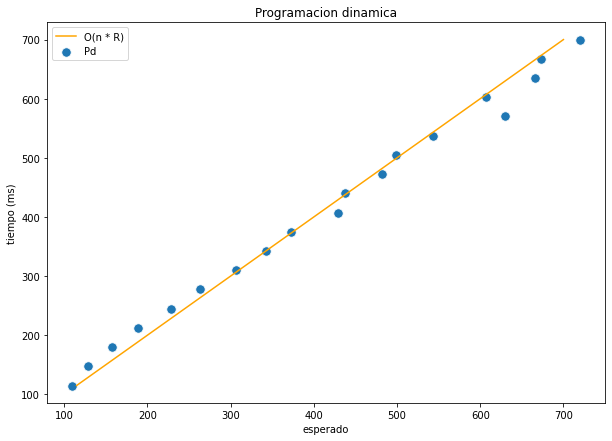

In [53]:
plt.figure(figsize=(10, 7))
# fig_pds = sns.lineplot(data=results_pd_stress.loc[results_pd_stress.n==N], x='r', y='esperado', color="orange")
# fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==N].r, results_pd_stress.loc[results_pd_stress.n==N].ms, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.lineplot(data=results_pd_stress.loc[results_pd_stress.n==N], x='esperado', y='esperado', color="orange")
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==N].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds.legend(labels=['O(n * R)','Pd'])
fig_pds.set(title="Programacion dinamica", xlabel='esperado', ylabel='tiempo (ms)')
plt.savefig('img/fb_vs_est')

plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=results_pd_stress.loc[results_pd_stress.n.isin(list(range(1000,5500,500)))], x='esperado', y='esperado', color="orange")
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==1000].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==1500].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==2000].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==2500].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==3000].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==3500].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==4000].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==4500].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds = sns.scatterplot(results_pd_stress.loc[results_pd_stress.n==5000].ms, results_pd_stress.loc[results_pd_stress.n==N].esperado, s=matplotlib.rcParams['lines.markersize'] ** 2.5)
fig_pds.legend(labels=['O(n * R)','Pd'])
fig_pds.set(title="Programacion dinamica", xlabel='esperado', ylabel='tiempo (ms)')

In [54]:
results_pd_stress.loc[results_pd_stress.n==1000].ms

0     23.271386
1     32.739819
2     30.884960
3     28.547994
4     29.955931
5     33.835667
6     39.792252
7     42.094419
8     46.937220
9     49.260563
10    53.928353
11    60.743603
12    60.535041
13    64.005065
14    67.374306
15    73.726315
16    76.622679
17    79.831501
18    83.456565
Name: ms, dtype: float64

---

In [55]:
results_btf_wc

,test_set,n,r,res,t,esperado,ms
0,1,10,10,10,27905,2048,0.027905
1,1,10,20,10,28777,2048,0.028777
2,1,11,20,11,59634,4096,0.059634
3,1,12,20,12,113517,8192,0.113517
4,1,13,20,13,163411,16384,0.163411
...,...,...,...,...,...,...,...
70,1,26,100,26,1347206294,134217728,1347.206294
71,1,27,100,27,2742666366,268435456,2742.666366
72,1,28,100,28,5435228873,536870912,5435.228873
73,1,29,100,29,10893280801,1073741824,10893.280801


In [56]:
results_fb_wc = pd.read_csv('resultados/results_wc_fb.txt', delimiter=' ')

In [57]:
results_fb_wc['ms'] = results_fb_wc['t'] / 1000000

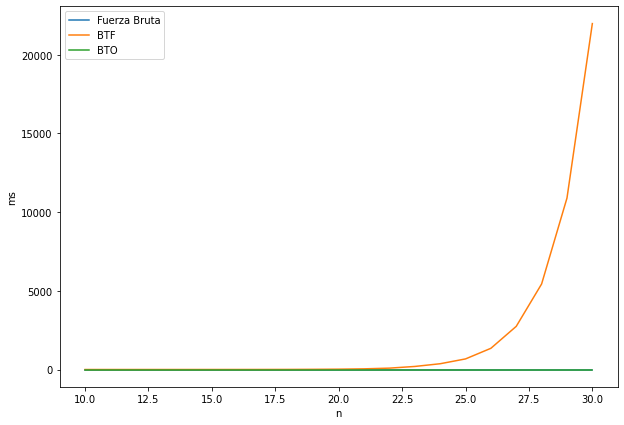

In [58]:
plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=results_bto_wc.loc[results_fb_wc.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=results_btf_wc.loc[results_btf_wc.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=results_bto_wc.loc[results_bto_wc.r==100], x='n', y='ms')
# plt.ylim(-0.1, 5)
fig_pds.legend(labels=['Fuerza Bruta','BTF','BTO'])
# fig_pds.set(title="Programacion dinamica", xlabel='esperado', ylabel='tiempo (ms)')
plt.savefig('img/ambos_peores_casos')

In [59]:
results_bto_wc_f = pd.read_csv('resultados/results_wc_bto_fliped.txt', delimiter=' ')
results_bto_wc_f['ms'] = results_bto_wc_f['t'] / 1000000

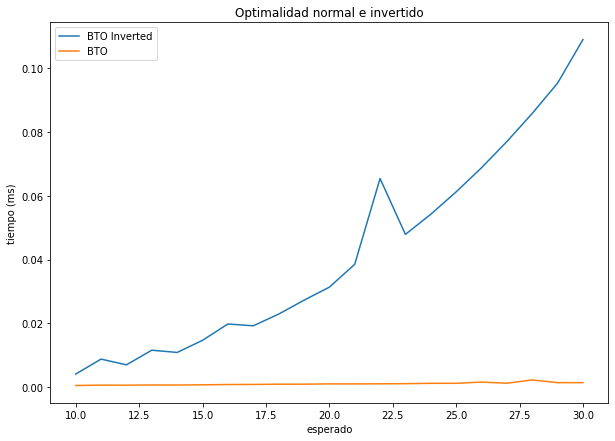

In [60]:
plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=results_bto_wc_f.loc[results_bto_wc_f.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=results_bto_wc.loc[results_bto_wc.r==100], x='n', y='ms')
fig_pds.legend(labels=['BTO Inverted','BTO'])
fig_pds.set(title="Optimalidad normal e invertido", xlabel='esperado', ylabel='tiempo (ms)')
plt.savefig('img/bto_inv')

In [61]:
check = results_fb_wc[['res']]
check['btf'] = results_fb_wc['res'] == results_btf_wc['res']
check['bto'] = results_fb_wc['res'] == results_bto_wc['res']
check['bto_f'] = results_fb_wc['res'] == results_bto_wc_f['res']

/home/pablo/pyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pablo/pyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pablo/pyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [62]:
r_wcbto_bto = pd.read_csv('resultados/results_wcbto_bto.txt', delimiter=' ')
r_wcbto_bto['ms'] = r_wcbto_bto['t'] / 1000000
r_wcbto_btf = pd.read_csv('resultados/results_wcbto_btf.txt', delimiter=' ')
r_wcbto_btf['ms'] = r_wcbto_btf['t'] / 1000000
r_wcbto_btf_flp = pd.read_csv('resultados/results_wcbto_bto_flp.txt', delimiter=' ')
r_wcbto_btf_flp['ms'] = r_wcbto_btf_flp['t'] / 1000000

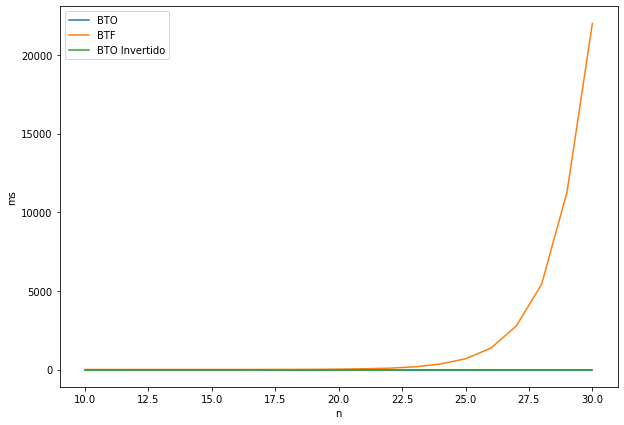

In [63]:
plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=r_wcbto_bto.loc[r_wcbto_bto.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=r_wcbto_btf.loc[r_wcbto_btf.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=r_wcbto_btf_flp.loc[r_wcbto_btf_flp.r==100], x='n', y='ms')
# plt.ylim(0, 0.1)
fig_pds.legend(labels=['BTO','BTF','BTO Invertido'])
# fig_pds.set(title="Optimalidad normal e invertido", xlabel='esperado', ylabel='tiempo (ms)')
# plt.savefig('img/wc_bto_inv')

In [64]:
results_pd.loc[results_pd.test_set==1].loc[results_pd.r==100]
results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100]

,test_set,n,r,res,t,esperado,inferior,ms
150,1,1,100,1,80,2.000000e-07,8.000000e-08,0.000080
151,1,2,100,2,98,4.000000e-07,1.600000e-07,0.000098
152,1,3,100,2,199,8.000000e-07,2.400000e-07,0.000199
153,1,4,100,4,157,1.600000e-06,3.200000e-07,0.000157
154,1,5,100,3,405,3.200000e-06,4.000000e-07,0.000405
155,1,6,100,5,647,6.400000e-06,4.800000e-07,0.000647
156,1,7,100,4,1737,1.280000e-05,5.600000e-07,0.001737
157,1,8,100,5,1913,2.560000e-05,6.400000e-07,0.001913
158,1,9,100,4,4420,5.120000e-05,7.200000e-07,0.004420
159,1,10,100,4,5129,1.024000e-04,8.000000e-07,0.005129


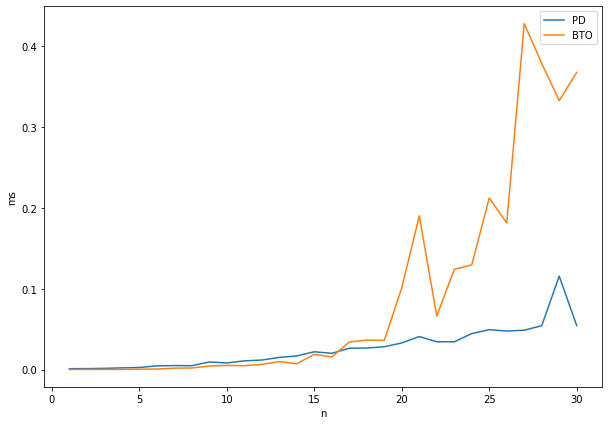

In [65]:
plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=results_pd.loc[results_pd.test_set==1].loc[results_pd.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=results_bto.loc[results_bto.test_set==1].loc[results_bto.r==100], x='n', y='ms')
# fig_pds = sns.lineplot(data=r_wcbto_btf_flp.loc[r_wcbto_btf_flp.r==100], x='n', y='ms')
# plt.ylim(0, 0.1)
fig_pds.legend(labels=['PD','BTO'])

---

# BTO vs PD

In [66]:
pd_vs_bto = pd.read_csv('resultados/bto_vs_pd.txt', delimiter=' ')
pd_vs_bto['ms'] = pd_vs_bto['t'] / 1000000

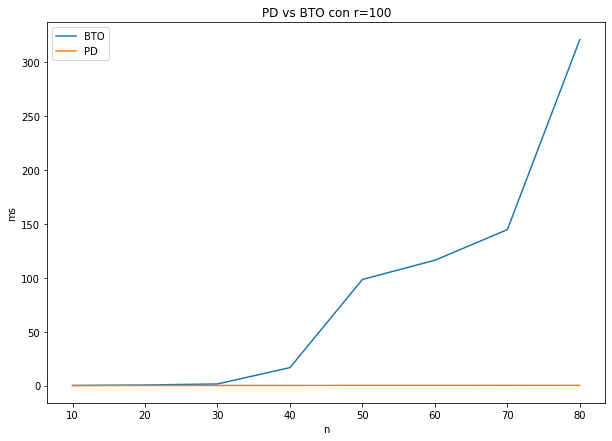

In [67]:
plt.figure(figsize=(10, 7))
fig_pds = sns.lineplot(data=pd_vs_bto.loc[pd_vs_bto.algoritmo=='BTO'].loc[pd_vs_bto.r==100], x='n', y='ms')
fig_pds = sns.lineplot(data=pd_vs_bto.loc[pd_vs_bto.algoritmo=='PD'].loc[pd_vs_bto.r==100], x='n', y='ms')
fig_pds.legend(labels=['BTO','PD'])
plt.title('PD vs BTO con r=100')
plt.savefig('img/pdvsbto')

---

In [83]:
results_bto.groupby(['n','r']).mean().reset_index()

,n,r,test_set,res,t,esperado,inferior,ms
0,1,1,2.0,0.000000,6.836667e+02,2.000000e-07,8.000000e-08,0.000684
1,1,10,2.0,1.000000,2.576667e+02,2.000000e-07,8.000000e-08,0.000258
2,1,20,2.0,0.666667,1.993333e+02,2.000000e-07,8.000000e-08,0.000199
3,1,50,2.0,1.000000,1.326667e+02,2.000000e-07,8.000000e-08,0.000133
4,1,75,2.0,1.000000,1.656667e+02,2.000000e-07,8.000000e-08,0.000166
...,...,...,...,...,...,...,...,...
175,30,10,2.0,3.333333,2.320900e+04,1.073742e+02,2.400000e-06,0.023209
176,30,20,2.0,4.666667,3.981133e+04,1.073742e+02,2.400000e-06,0.039811
177,30,50,2.0,6.000000,4.568737e+05,1.073742e+02,2.400000e-06,0.456874
178,30,75,2.0,8.000000,1.042310e+06,1.073742e+02,2.400000e-06,1.042310


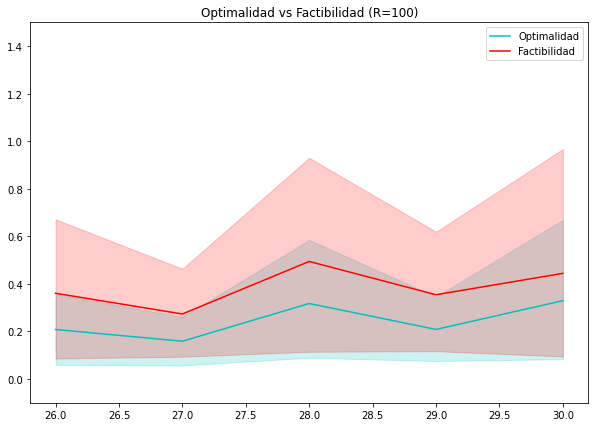

In [88]:
plt.figure(figsize=(10, 7))
fig_fb = sns.lineplot(results_bto.groupby(['n','r']).mean().reset_index().loc[results_bto.r==100].n.tolist(), results_bto.groupby(['n','r']).mean().reset_index().loc[results_bto.r==100].ms.tolist(), color='c')
fig_fb = sns.lineplot(results_btf.groupby(['n','r']).mean().reset_index().loc[results_bto.r==100].n.tolist(), results_btf.groupby(['n','r']).mean().reset_index().loc[results_bto.r==100].ms.tolist(), color='r')
plt.ylim(-0.1, 1.5)
plt.legend(labels=['Optimalidad', 'Factibilidad'])
plt.title('Optimalidad vs Factibilidad (R=100)')
plt.savefig('img/bt_comp_both')
# fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')